# Packages

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
import pyspark.sql.functions as F

# Functions

In [0]:
%run "/Users/david.piedrahita@idata.com.co/workshop/Functions/utils"

# Read Data

In [0]:
df = spark.read.format("csv")\
               .option("header", True)\
               .load("dbfs:/FileStore/shared_uploads/david.piedrahita@idata.com.co/minute_weather.csv")

In [0]:
df.display()

rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,null,null,60.5
1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,2011-09-10 00:03:49,912.3,64.4,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,2011-09-10 00:04:49,912.3,64.4,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,2011-09-10 00:05:49,912.3,63.5,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


In [0]:
df.count()

Out[13]: 1587257

In [0]:
workingDF = df.drop("hpwren_timestamp")

In [0]:
workingDF.display()

rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,null,null,60.5
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,912.3,64.4,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,912.3,64.4,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,912.3,63.5,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


In [0]:
before = workingDF.count()
workingDF = workingDF.na.drop()
after = workingDF.count()
before - after

Out[17]: 434

# Construccion del modelo

In [0]:
for column in workingDF.columns:
    workingDF = workingDF.withColumn(column, workingDF[column].cast("float"))
    

In [0]:
feautures = workingDF.columns
feautures.remove("rowID")

In [0]:
assembler = VectorAssembler(inputCols = feautures, outputCol = "features")
assembler

Out[27]: VectorAssembler_cd6e1f4419be

In [0]:
assembled = assembler.transform(workingDF)
assembled.display()

rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,features
1.0,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 63.86000061035156, 161.0, 0.800000011920929, 215.0, 1.5, 43.0, 0.20000000298023224, 0.0, 0.0, 39.900001525878906))"
2.0,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 64.22000122070312, 77.0, 0.699999988079071, 143.0, 1.2000000476837158, 324.0, 0.30000001192092896, 0.0, 0.0, 43.0))"
3.0,912.3,64.4,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 64.4000015258789, 89.0, 1.2000000476837158, 112.0, 1.600000023841858, 12.0, 0.699999988079071, 0.0, 0.0, 49.5))"
4.0,912.3,64.4,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 64.4000015258789, 185.0, 0.4000000059604645, 260.0, 1.0, 100.0, 0.10000000149011612, 0.0, 0.0, 58.79999923706055))"
5.0,912.3,63.5,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 63.5, 76.0, 2.5, 92.0, 3.0, 61.0, 2.0, 0.0, 0.0, 62.599998474121094))"
6.0,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.779998779296875, 79.0, 2.4000000953674316, 89.0, 2.700000047683716, 62.0, 2.0, 0.0, 0.0, 65.5999984741211))"
7.0,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.41999816894531, 86.0, 2.0, 92.0, 2.4000000953674316, 75.0, 1.7999999523162842, 0.0, 0.0, 65.19999694824219))"
8.0,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.2400016784668, 105.0, 1.399999976158142, 125.0, 1.899999976158142, 82.0, 1.0, 0.0, 0.0, 65.80000305175781))"
9.0,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.2400016784668, 93.0, 0.4000000059604645, 126.0, 0.699999988079071, 14.0, 0.20000000298023224, 0.0, 0.0, 58.599998474121094))"
10.0,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.2400016784668, 144.0, 1.2000000476837158, 167.0, 1.7999999523162842, 115.0, 0.6000000238418579, 0.0, 0.0, 38.5))"


# Scaled Values

In [0]:
scaler = StandardScaler(inputCol = "features",
                        outputCol = "features_scaled",
                        withStd = True,
                        withMean = True)

scalerModel = scaler.fit(assembled)
scalerData = scalerModel.transform(assembled)
scalerData.display()

In [0]:
clusters = range(2, 40)
model_list = elbow(scalerData, clusters)

Training for cluster size 2 
......................WSSE = 147161646.6656684 
Training for cluster size 3 
......................WSSE = 116912999.52715294 
Training for cluster size 4 
......................WSSE = 100633438.29011425 
Training for cluster size 5 
......................WSSE = 100479681.73377767 
Training for cluster size 6 
......................WSSE = 90130261.21080491 
Training for cluster size 7 
......................WSSE = 70133170.62069494 
Training for cluster size 8 
......................WSSE = 65445011.20400765 
Training for cluster size 9 
......................WSSE = 65382368.46901583 
Training for cluster size 10 
......................WSSE = 62652825.809583195 
Training for cluster size 11 
......................WSSE = 59676199.625794746 
Training for cluster size 12 
......................WSSE = 58017797.636462964 
Training for cluster size 13 
......................WSSE = 55376765.97509346 
Training for cluster size 14 
......................WSSE = 53493477.00372702 
Training for cluster size 15 
......................WSSE = 52349713.13624145 
Training for cluster size 16 
......................WSSE = 50148206.87923423 
Training for cluster size 17 
......................WSSE = 49663119.729305595 
Training for cluster size 18 
......................WSSE = 50079249.112962544 
Training for cluster size 19 
......................WSSE = 48027644.37203564 
Training for cluster size 20 
......................WSSE = 46752699.39816367 
Training for cluster size 21 
......................WSSE = 47071893.5078412 
Training for cluster size 22 
......................WSSE = 46030622.93520357 
Training for cluster size 23 
......................WSSE = 43667028.170339875 
Training for cluster size 24 
......................WSSE = 45070982.65504273 
Training for cluster size 25 
......................WSSE = 43284804.87893703 
Training for cluster size 26 
......................WSSE = 42108986.506228745 
Training for cluster size 27 
......................WSSE = 42164550.54224542 
Training for cluster size 28 
......................WSSE = 41185090.226346314 
Training for cluster size 29 
......................WSSE = 40480861.69795722 
Training for cluster size 30 
......................WSSE = 40445413.489573054 
Training for cluster size 31 
......................WSSE = 39287300.807534724 
Training for cluster size 32 
......................WSSE = 39476382.95484978 
Training for cluster size 33 
......................WSSE = 38905129.91398589 
Training for cluster size 34 
......................WSSE = 38441451.53781707 
Training for cluster size 35 
......................WSSE = 39028965.7832132 
Training for cluster size 36 
......................WSSE = 37956556.90080458 
Training for cluster size 37 
......................WSSE = 37226779.53406762 
Training for cluster size 38 
......................WSSE = 37380879.87140484 
Training for cluster size 39 
......................WSSE = 36848869.12487372

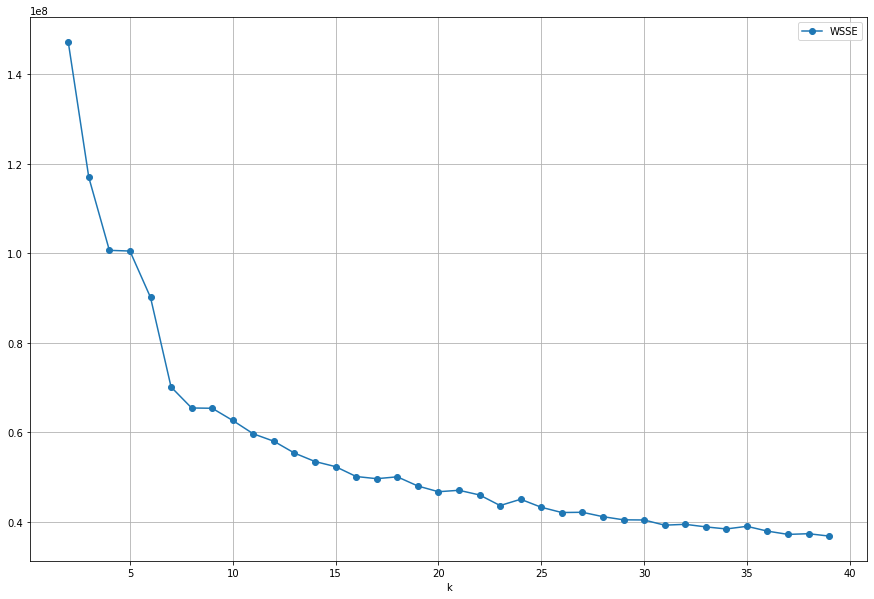

In [0]:
graph = elbow_plot(model_list, clusters)
display(graph)

In [0]:
kmeans = KMeans(k = 10, seed = 42)
model = kmeans.fit(scalerData)
model_transform = model.transform(scalerData)

In [0]:
display(model_transform)

rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,features,features_scaled,prediction
1.0,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 63.86000061035156, 161.0, 0.800000011920929, 215.0, 1.5, 43.0, 0.20000000298023224, 0.0, 0.0, 39.900001525878906))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.16942290696301626, -0.010140102065947334, -0.9580324257139847, 0.5586061594154068, -0.7840210446887128, -1.270499915777397, -1.1075923189810537, -0.0019303457683533863, -0.006605076277752397, -0.2936702143886603))",1
2.0,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 64.22000122070312, 77.0, 0.699999988079071, 143.0, 1.2000000476837158, 324.0, 0.30000001192092896, 0.0, 0.0, 43.0))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.19984707524722548, -0.8924176443436673, -1.006558269466614, -0.2208908844875926, -0.9078259063334895, 1.6126527227690899, -1.0502970647431062, -0.0019303457683533863, -0.006605076277752397, -0.17538744809839568))",3
3.0,912.3,64.4,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 64.4000015258789, 89.0, 1.2000000476837158, 112.0, 1.600000023841858, 12.0, 0.699999988079071, 0.0, 0.0, 49.5))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.21505915938933007, -0.7663779954468501, -0.7639290796271182, -0.5565076672791618, -0.7427527410752406, -1.5885701356882194, -0.8211160819419462, -0.0019303457683533863, -0.006605076277752397, 0.07262492587694949))",5
4.0,912.3,64.4,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 64.4000015258789, 185.0, 0.4000000059604645, 260.0, 1.0, 100.0, 0.10000000149011612, 0.0, 0.0, 58.79999923706055))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.21505915938933007, 0.24193919572768693, -1.1521357573390265, 1.0457918118547815, -0.9903625135604338, -0.6856611243284655, -1.1648875689501725, -0.0019303457683533863, -0.006605076277752397, 0.42747337030037796))",9
5.0,912.3,63.5,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 63.5, 76.0, 2.5, 92.0, 3.0, 61.0, 2.0, 0.0, 0.0, 62.599998474121094))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.13899873867880705, -0.9029209484184021, -0.13309328438483903, -0.7730346239188839, -0.1649966380735495, -1.0858139816356291, -0.07627783661223114, -0.0019303457683533863, -0.006605076277752397, 0.572465190590822))",5
6.0,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.779998779296875, 79.0, 2.4000000953674316, 89.0, 2.700000047683716, 62.0, 2.0, 0.0, 0.0, 65.5999984741211))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.07815040211038864, -0.8714110361941978, -0.18161907029016836, -0.8055136674148422, -0.28880149971832625, -1.0755536519610864, -0.07627783661223114, -0.0019303457683533863, -0.006605076277752397, 0.6869324401179044))",5
7.0,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2,"Map(vectorType -> dense, length -> 11, values -> List(912.2999877929688, 62.41999816894531, 86.0, 2.0, 92.0, 2.4000000953674316, 75.0, 1.7999999523162842, 0.0, 0.0, 65.19999694824219))","Map(vectorType -> dense, length -> 11, values -> List(-1.484596664123684, 0.04772623382617942, -0.7978879076710544, -0.3757224453006848, -0.7730346239188839, -0.41260636136310297, -0.942169366192032, -0.1908683621634409, -0.0019303457683533863, -0.006605076277752397, 0.6716700819599063))",1
8.0,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,6

In [0]:
model_transform.groupby("prediction").count().display()

prediction,count
1,91821
6,156064
3,97624
5,218984
9,411556
8,68721
2,142886
0,399162
7,3
4,2
